<font color='green'><h1><center>INFO 6105 FINAL PROJECT(Team 20)</center></h1></font>
<font color='green'><h2><center>Twitter - Sentiment Analysis</center></h2></font>
<font color='green'><center><h3>Instructor:   Dr. Handan Liu</h3></center></font>
<font color='green'><h3>Team:</h3></font>
<ul>
  <li><h4>Rishika Gurram (002775401)</h4></li>
  <li><h4>Sudharsan Ragavendhiran Anuradha (002783355)</h4></li>
</ul>




<font color='green'><h2>Table of Contents</h2></font>
<ul>
  <li><font color='green'><h3>Import dependencies</h3></font></li>
  <li><font color='green'><h3>Import dataset</h3></font></li>
<li><font color='green'><h3>Data Preprocessing</h3></font></li>
<li><font color='green'><h3>Prepare Test and Training Data</h3></font></li>
<li><font color='green'><h3>Creating and Evaluating Models</h3></font></li>
    <ol>
        <li><font color='green'><h3>Logistic Regression Model</h3></font></li>
        <li><font color='green'><h3>Naïve Bayes Multinomial Model</h3></font></li>
        <li><font color='green'><h3>BernoulliNB Model</h3></font></li>
        <li><font color='green'><h3>LinearSVC Model</h3></font></li>
        <li><font color='green'><h3>Random Forest</h3></font></li>
    </ol>
</ul>

<font color='green'><center><h2>Import Dependencies</h2></center></font>

In [1]:
import numpy as np
import nltk
import nltk.stem
#nltk.download('omw-1.4')
import seaborn as sns
#nltk.download('wordnet')
import re
import matplotlib.pyplot as pt
import pickle
import pandas as pd
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

<font color='green'><center><h2>Import Dataset</h2></center></font>

In [2]:
dataset = pd.read_csv('/Users/sudharsan/Downloads/training.1600000.processed.noemoticon.csv',
                      encoding="ISO-8859-1", names=["sentimentType", "id", "date", "query", "username", "data"])

<font color='green'><center><h2>Preprocessing Text</h2></center></font>

<AxesSubplot:title={'center':'Users with most tweets'}>

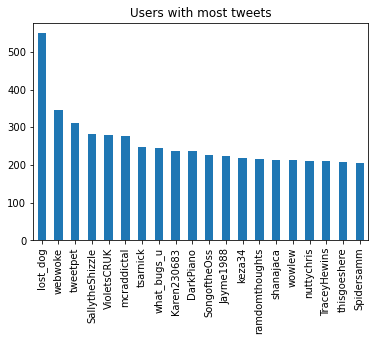

In [3]:
dataset['username'].value_counts()[:20].plot(title= 'Users with most tweets' ,kind='bar')

In [4]:
dataset1 = dataset[['sentimentType','data']]

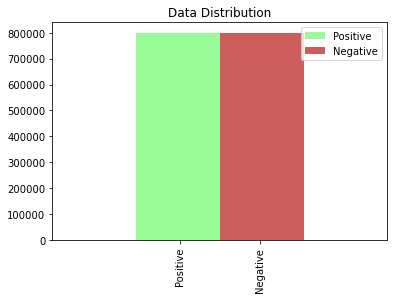

In [5]:
ax = dataset1.groupby('sentimentType').count().T.plot(kind='bar', label='index',title='Data Distribution', color=['palegreen','indianred'])
ax.set_xlim(None, None)
ax.set_xticks([-0.12,0.12])
ax.set_xticklabels(['Positive','Negative'])
ax.legend(['Positive', 'Negative'])
pt.show()

In [6]:
data, sentiment = list(dataset['data']), list(dataset['sentimentType'])

In [7]:
smileys = smileys = {':-)': 'happyface', ':)': 'happyface', ';)': 'one eye blink',  ';-)': 'one eye blink',':E': 'vamp' , '=^.^=': 'cat', ':-(': 'cry', 
          ':(': 'cry', ':<': 'sad', ':-P': 'tongue out', ':-O': 'surprise face', ':@': 'shockface', ':-@': 'shockface',':$': 'confused face', ':#': 'muted', ':X': 'muted', ':^)': 'happy face', ':&': 'confused face', '$_$': 'greedy face',
          '@@': 'eyeroll', ':-!': 'confused face'  , ':D': 'happy face', ':0': 'yellingface', 'O.o': 'confusedface',
          '<(-_-)>': 'robot', ":'-)": 'sad smile', 'O:)': 'angel face','(:D': 'gossip'
}

stopwordlist = ['youve', 'your', 'yours', 'yourself', 'yourselves'
             'why', 'with', 'will','y', 'you', 'you would',"you all", "you are",
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             't', 'that', "that will", 'their', 'theirs', 'them','than', 'the',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'into','is', 'its','it',  'itself','just', 'll',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
'a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',]

In [8]:
op = []
WordNetLemmatizer = WordNetLemmatizer()
urlRegex        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userRegex       = '@[^\s]+'
alphaRegex      = "[^a-zA-Z0-9]"
extraSpaceRegex   = r"(.)\1\1+"
extraRegex = r"\1\1"
    
for i in data:
    i = i.lower()
    i = re.sub(urlRegex,' URL',i)
    for j in smileys.keys():
        i = i.replace(j, "EMOJI" + smileys[j])        
    i = re.sub(userRegex,' USER', i)        
    i = re.sub(alphaRegex, " ", i)
    i = re.sub(extraSpaceRegex, extraRegex, i)
    text = ''
    for x in i.split():
        if len(x)>1:
            x = WordNetLemmatizer.lemmatize(x)
            text += (x+' ')
            
    op.append(text)

In [9]:
processedtext = op

Negative Word Map


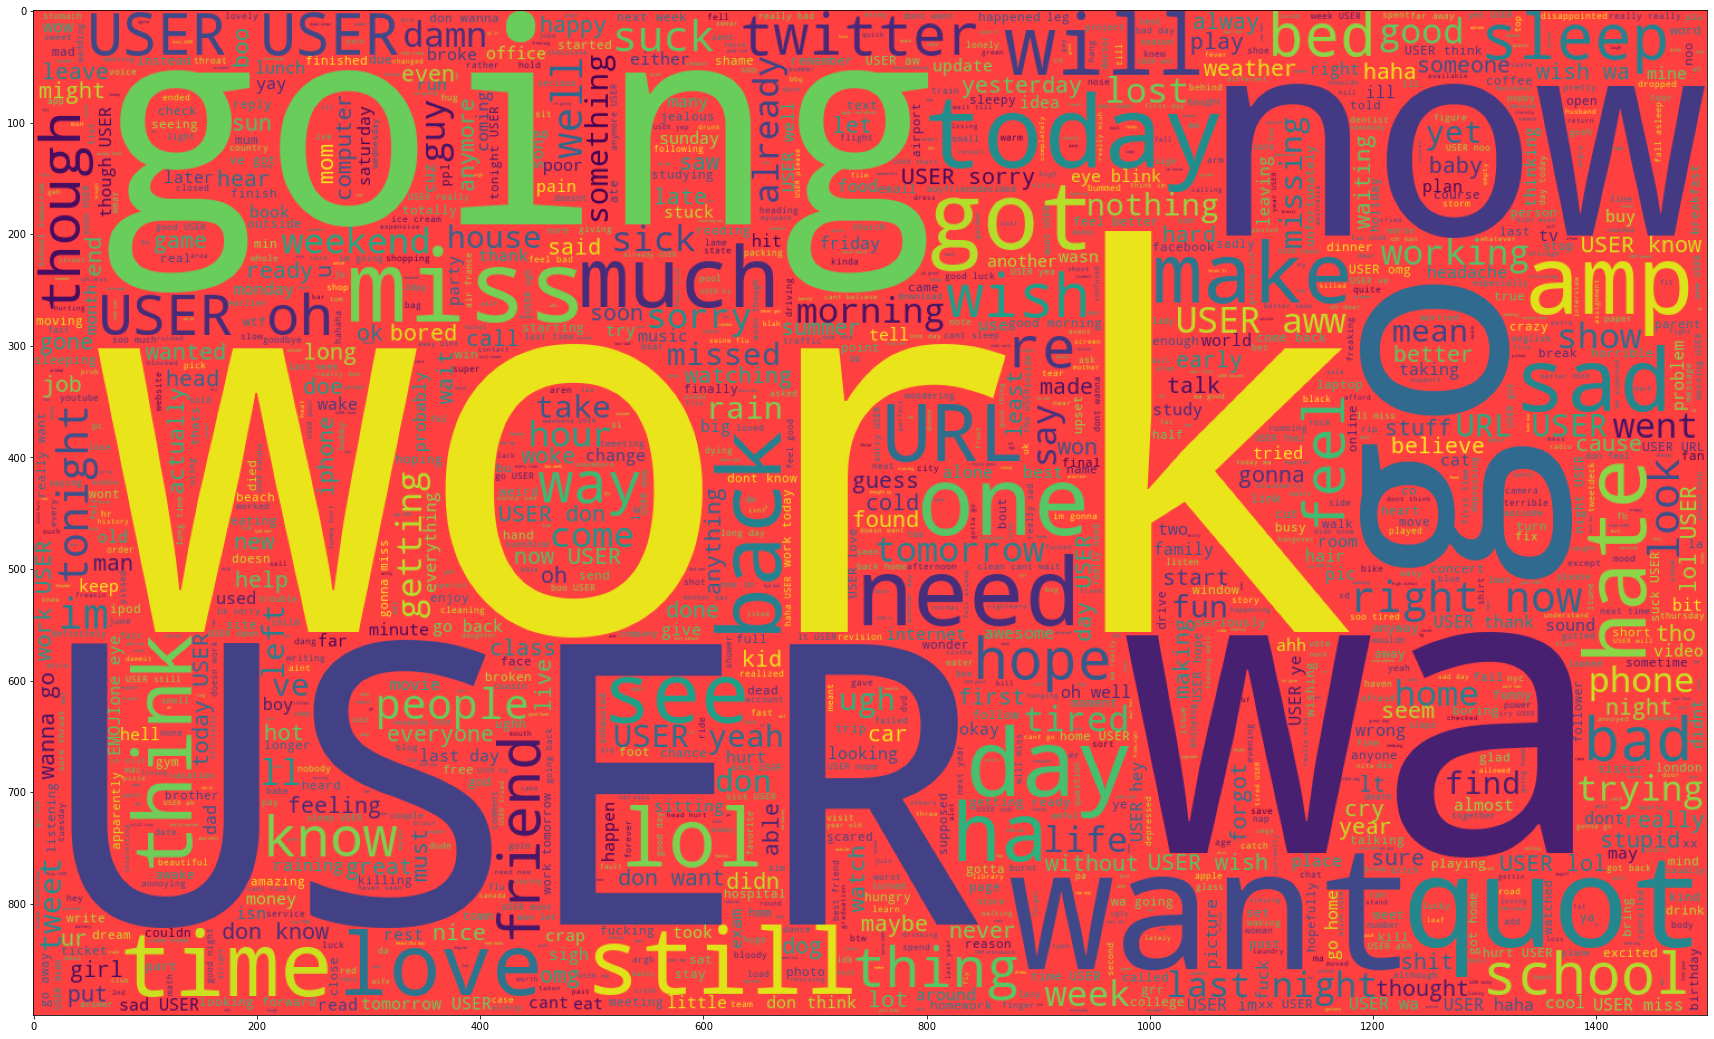

In [10]:
negativeWordList = processedtext[:700000]
pt.figure(figsize = (30,30))
wc = WordCloud(background_color="#ff4040",max_words = 1500 , width = 1500 , height = 900).generate(" ".join(negativeWordList))
print("Negative Word Map")
pt.imshow(wc)

Positive Word Map


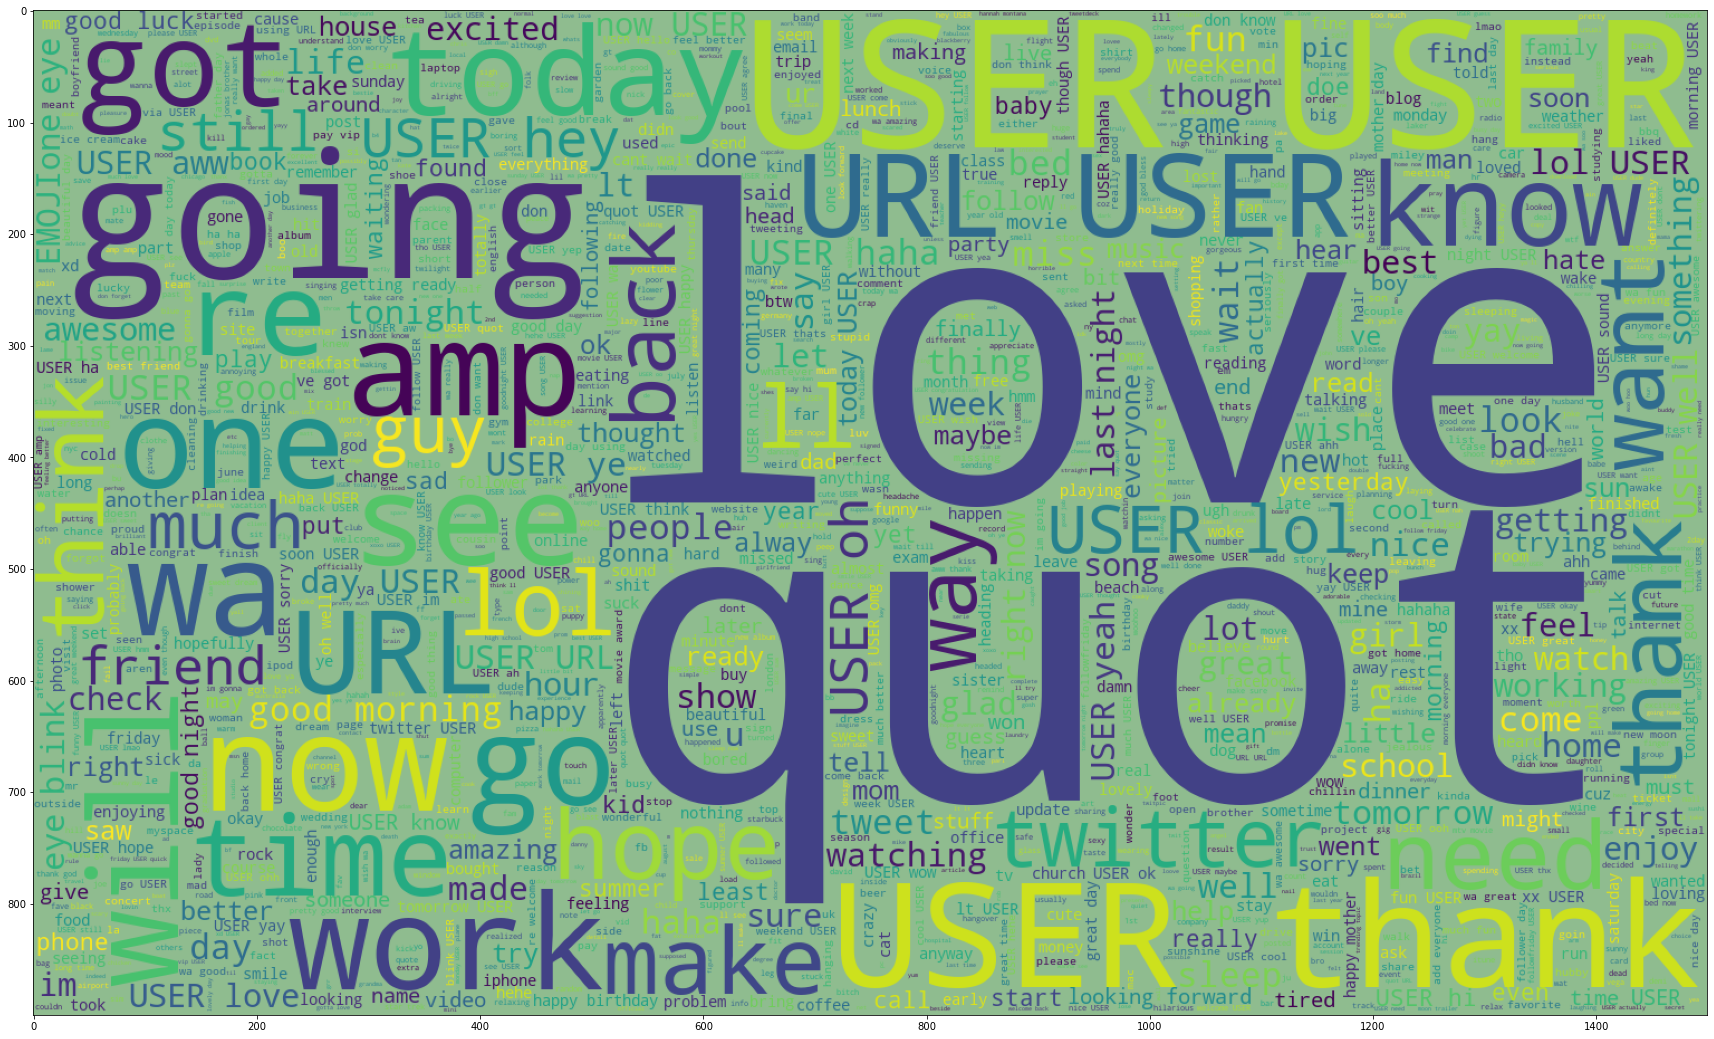

In [11]:
posWordList = processedtext[700000:]
wc = WordCloud(background_color="#8fbc8f", max_words = 1500 , width = 1500 , height = 900).generate(" ".join(posWordList))
pt.figure(figsize = (30,30))
print("Positive Word Map")
pt.imshow(wc)

<font color='green'><center><h2>Splitting data</h2></center></font>

In [12]:
X_trainSet, X_testSet, y_trainSet, y_testSet = train_test_split(processedtext, sentiment,test_size = 0.02, random_state = 0)

In [13]:
print("XTrain length: "+str(len(X_trainSet)))
print("XTest length: "+str(len(X_testSet)))
print("YTrain length: "+str(len(y_trainSet)))
print("YTest length: "+str(len(y_testSet)))

XTrain length: 1568000
XTest length: 32000
YTrain length: 1568000
YTest length: 32000


In [14]:
vec = TfidfVectorizer(ngram_range=(1,2), max_features=600000)
vec.fit(X_trainSet)

TfidfVectorizer(max_features=600000, ngram_range=(1, 2))

In [15]:
X_trainSet = vec.transform(X_trainSet)
X_testSet  = vec.transform(X_testSet)

<font color='green'><center><h2>Creating and Evaluating Models</h2></center></font>

<font color='green'><center><h2>Logistic Regression Model</h2></center></font>

In [16]:
LRmodel = LogisticRegression(C = 2, max_iter = 1200, n_jobs=-1)
LRmodel.fit(X_trainSet, y_trainSet)
y_predSet = LRmodel.predict(X_testSet)

In [17]:
print(classification_report(y_testSet, y_predSet))
lrAcc=classification_report(y_testSet, y_predSet,output_dict= True)["accuracy"]
lrAcc

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     16001
           4       0.82      0.84      0.83     15999

    accuracy                           0.83     32000
   macro avg       0.83      0.83      0.83     32000
weighted avg       0.83      0.83      0.83     32000



0.82709375

Text(0.5, 1.0, 'Logistic Regression - ConfusionMatrix')

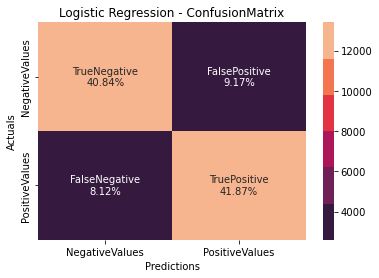

In [18]:
confusionMatrix = confusion_matrix(y_testSet, y_predSet)

x  = ['NegativeValues','PositiveValues']
y = ['TrueNegative','FalsePositive', 'FalseNegative','TruePositive']
z = ['{0:.2%}'.format(value) for value in confusionMatrix.flatten() / np.sum(confusionMatrix)]

l = [f'{i}\n{j}' for i, j in zip(y,z)]
l = np.asarray(l).reshape(2,2)
colormap = sns.color_palette("rocket")
sns.heatmap(confusionMatrix, annot = l, cmap = colormap,fmt = '',xticklabels = x, yticklabels = x)

pt.xlabel("Predictions")
pt.ylabel("Actuals")
pt.title ("Logistic Regression - ConfusionMatrix")

<font color='green'><center><h2>Naïve Bayes Multinomial Model</h2></center></font>

In [19]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_trainSet, y_trainSet)
y_predSet = nb.predict(X_testSet)

In [20]:
print(classification_report(y_testSet, y_predSet))
multAcc =classification_report(y_testSet, y_predSet,output_dict= True)["accuracy"]
print("accuracy of class predictions",multAcc)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81     16001
           4       0.81      0.80      0.81     15999

    accuracy                           0.81     32000
   macro avg       0.81      0.81      0.81     32000
weighted avg       0.81      0.81      0.81     32000

accuracy of class predictions 0.80728125


Text(0.5, 1.0, 'Multinomial - ConfusionMatrix')

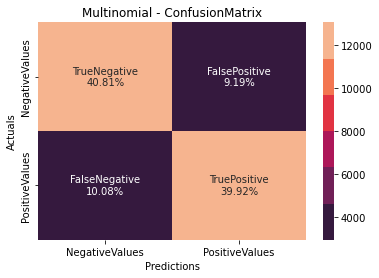

In [21]:
confusionMatrix = confusion_matrix(y_testSet, y_predSet)

x  = ['NegativeValues','PositiveValues']
y = ['TrueNegative','FalsePositive', 'FalseNegative','TruePositive']
z = ['{0:.2%}'.format(value) for value in confusionMatrix.flatten() / np.sum(confusionMatrix)]

l = [f'{i}\n{j}' for i, j in zip(y,z)]
l = np.asarray(l).reshape(2,2)
colormap = sns.color_palette("rocket")
sns.heatmap(confusionMatrix, annot = l, cmap = colormap,fmt = '',xticklabels = x, yticklabels = x)

pt.xlabel("Predictions")
pt.ylabel("Actuals")
pt.title ("Multinomial - ConfusionMatrix")

<font color='green'><center><h2>LinearSVC Model</h2></center></font>

In [22]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_trainSet, y_trainSet)
y_predSet = SVCmodel.predict(X_testSet)

In [23]:
print(classification_report(y_testSet, y_predSet))
lsvcAcc =classification_report(y_testSet, y_predSet,output_dict= True)["accuracy"]
print("accuracy of class predictions",lsvcAcc)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     16001
           4       0.81      0.83      0.82     15999

    accuracy                           0.82     32000
   macro avg       0.82      0.82      0.82     32000
weighted avg       0.82      0.82      0.82     32000

accuracy of class predictions 0.81684375


Text(0.5, 1.0, 'LinearSVC - Confusion Matrix')

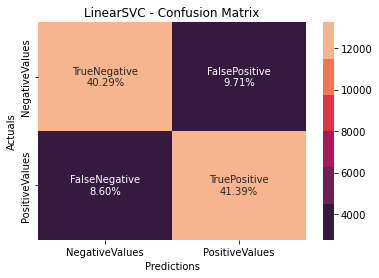

In [24]:
confusionMatrix = confusion_matrix(y_testSet, y_predSet)

x  = ['NegativeValues','PositiveValues']
y = ['TrueNegative','FalsePositive', 'FalseNegative','TruePositive']
z = ['{0:.2%}'.format(value) for value in confusionMatrix.flatten() / np.sum(confusionMatrix)]

l = [f'{i}\n{j}' for i, j in zip(y,z)]
l = np.asarray(l).reshape(2,2)
colormap = sns.color_palette("rocket")
sns.heatmap(confusionMatrix, annot = l, cmap = colormap,fmt = '',xticklabels = x, yticklabels = x)

pt.xlabel("Predictions")
pt.ylabel("Actuals")
pt.title ("LinearSVC - Confusion Matrix")

<font color='green'><center><h2>BernoulliNB Model</h2></center></font>

In [25]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_trainSet, y_trainSet)
y_predSet = BNBmodel.predict(X_testSet)

In [26]:
print(classification_report(y_testSet, y_predSet))
bnbAcc =classification_report(y_testSet, y_predSet,output_dict= True)["accuracy"]
print("accuracy of class predictions",bnbAcc)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     16001
           4       0.80      0.81      0.80     15999

    accuracy                           0.80     32000
   macro avg       0.80      0.80      0.80     32000
weighted avg       0.80      0.80      0.80     32000

accuracy of class predictions 0.8019375


Text(0.5, 1.0, 'BernoulliNB - ConfusionMatrix')

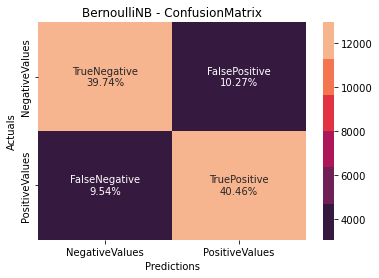

In [27]:
confusionMatrix = confusion_matrix(y_testSet, y_predSet)

x  = ['NegativeValues','PositiveValues']
y = ['TrueNegative','FalsePositive', 'FalseNegative','TruePositive']
z = ['{0:.2%}'.format(value) for value in confusionMatrix.flatten() / np.sum(confusionMatrix)]

l = [f'{i}\n{j}' for i, j in zip(y,z)]
l = np.asarray(l).reshape(2,2)
colormap = sns.color_palette("rocket")
sns.heatmap(confusionMatrix, annot = l, cmap = colormap,fmt = '',xticklabels = x, yticklabels = x)

pt.xlabel("Predictions")
pt.ylabel("Actuals")
pt.title ("BernoulliNB - ConfusionMatrix")

<font color='green'><center><h2>Random Forest</h2></center></font>

In [28]:
randomForest = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50)
randomForest.fit(X_trainSet, y_trainSet)
y_predSet = randomForest.predict(X_testSet)

In [29]:
print(classification_report(y_testSet, y_predSet))
rfAcc =classification_report(y_testSet, y_predSet,output_dict= True)["accuracy"]
print("accuracy of class predictions",rfAcc)

              precision    recall  f1-score   support

           0       0.75      0.70      0.72     16001
           4       0.72      0.76      0.74     15999

    accuracy                           0.73     32000
   macro avg       0.73      0.73      0.73     32000
weighted avg       0.73      0.73      0.73     32000

accuracy of class predictions 0.7301875


Text(0.5, 1.0, 'Random Forest - ConfusionMatrix')

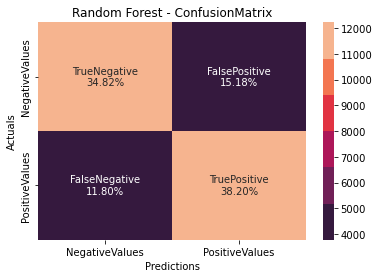

In [30]:
confusionMatrix = confusion_matrix(y_testSet, y_predSet)

x  = ['NegativeValues','PositiveValues']
y = ['TrueNegative','FalsePositive', 'FalseNegative','TruePositive']
z = ['{0:.2%}'.format(value) for value in confusionMatrix.flatten() / np.sum(confusionMatrix)]

l = [f'{i}\n{j}' for i, j in zip(y,z)]
l = np.asarray(l).reshape(2,2)
colormap = sns.color_palette("rocket")
sns.heatmap(confusionMatrix, annot = l, cmap = colormap,fmt = '',xticklabels = x, yticklabels = x)

pt.xlabel("Predictions")
pt.ylabel("Actuals")
pt.title ("Random Forest - ConfusionMatrix")

## Model Comparision

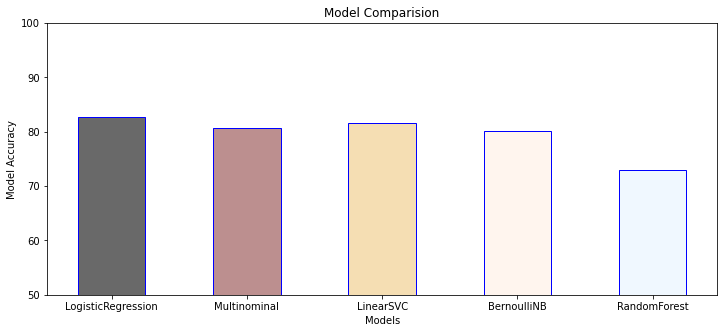

In [31]:
models = ["LogisticRegression", "Multinominal", "LinearSVC","BernoulliNB","RandomForest"]
acc = [lrAcc*100,multAcc*100,lsvcAcc*100,bnbAcc*100,rfAcc*100]
fig = pt.figure(figsize = (12, 5))
 
pt.bar(models, acc, color =['dimgrey','rosybrown','wheat','seashell','aliceblue'],width = 0.5,edgecolor='blue')
pt.ylim(50, 100)
pt.xlabel("Models")
pt.ylabel("Model Accuracy")
pt.title("Model Comparision")
pt.show()